In [2]:
# statsmodels - package providing datasets in public domain
# !pip install statsmodels
# time series plot

import pandas as pd
import matplotlib.pyplot as plt
import dateutil as du

df = pd.read_csv('/home/baskar/venv-python37/lib/python3.7/site-packages/statsmodels/datasets/co2/co2.csv')

#print(df.head()) # print 1st 5 rows

df['datetime'] = df['date'].apply(lambda x: du.parser.parse(str(x)))

print(df.head())

       date    co2   datetime
0  19580329  316.1 1958-03-29
1  19580405  317.3 1958-04-05
2  19580412  317.6 1958-04-12
3  19580419  317.5 1958-04-19
4  19580426  316.4 1958-04-26


In [4]:
# DatetimeIndex - set the date time column as index

df.set_index(pd.DatetimeIndex(df['datetime']),inplace=True) # changes the dataframe inline

print(df.head())

                date    co2   datetime
datetime                              
1958-03-29  19580329  316.1 1958-03-29
1958-04-05  19580405  317.3 1958-04-05
1958-04-12  19580412  317.6 1958-04-12
1958-04-19  19580419  317.5 1958-04-19
1958-04-26  19580426  316.4 1958-04-26


In [5]:
df.drop(['date'],axis=1,inplace=True)

print(df.head())

              co2   datetime
datetime                    
1958-03-29  316.1 1958-03-29
1958-04-05  317.3 1958-04-05
1958-04-12  317.6 1958-04-12
1958-04-19  317.5 1958-04-19
1958-04-26  316.4 1958-04-26


In [8]:
# resample frequency from weekly to monthly frequency
#df1 = df['co2'].resample('MS') # MS - set month beginning as date
df1 = df['co2'].resample('M').mean() # MS - set month beginning as date
print(df1.head())

datetime
1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-06-30           NaN
1958-07-31    315.625000
Freq: M, Name: co2, dtype: float64


In [9]:
# fillna - used for filling null values
#          bfill - fills valid succeeding values
#          ffill - fills valid preceeding values

df1 = df1.fillna(df1.bfill())

print(df1.head())

datetime
1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-06-30    315.625000
1958-07-31    315.625000
Freq: M, Name: co2, dtype: float64


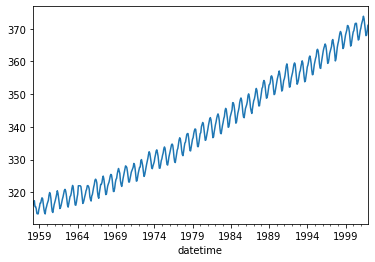

In [10]:
df1.plot()

plt.show()